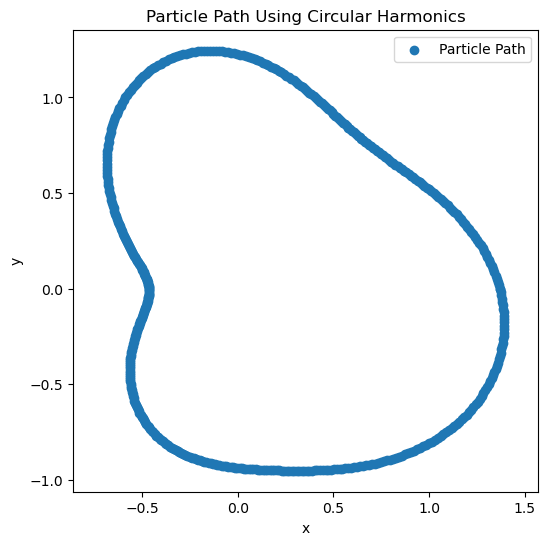

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100)

def circular_harmonics(theta, a0, an, bn, n_terms):
    result = a0
    for n in range(1, n_terms + 1):
        result += an[n - 1] * np.cos(n * theta) + bn[n - 1] * np.sin(n * theta)
    return result

a0 = 1
n_terms = 3
an = np.random.uniform(-0.5, 1, n_terms)
bn = np.random.uniform(-0.1, 0.1, n_terms)

theta = np.linspace(0, 2 * np.pi, 500)

r = circular_harmonics(theta, a0, an, bn, n_terms)

x = r * np.cos(theta)
y = r * np.sin(theta)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, label="Particle Path")
plt.title("Particle Path Using Circular Harmonics")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.legend()
plt.show()


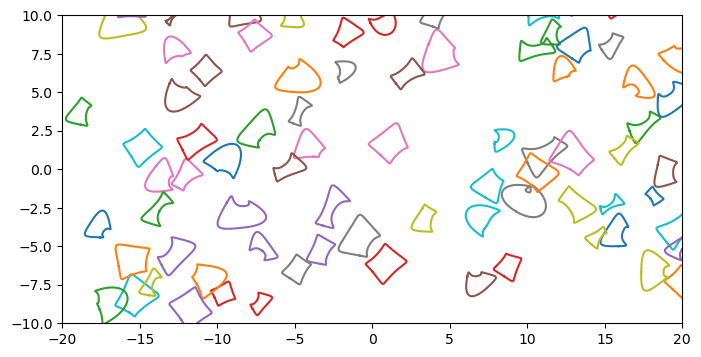

In [48]:
# ref: https://stackoverflow.com/questions/72590426/non-overlapping-random-shapes-on-2d-plane

import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.special import binom

def dist(x1, y1, x2, y2):
  return np.sqrt((x1-x2)**2 + (y1-y2)**2)

bernstein = lambda n, k, t: binom(n,k)* t**k * (1.-t)**(n-k)

def bezier(points, num=100):
    N = len(points)
    t = np.linspace(0, 1, num=num)
    curve = np.zeros((num, 2))
    for i in range(N):
        curve += np.outer(bernstein(N - 1, i, t), points[i])
    return curve

class Segment():
    def __init__(self, p1, p2, angle1, angle2, **kw):
        self.p1 = p1; self.p2 = p2
        self.angle1 = angle1; self.angle2 = angle2
        self.numpoints = kw.get("numpoints", 100)
        r = kw.get("r", 4)
        d = np.sqrt(np.sum((self.p2-self.p1)**2))
        self.r = r*d
        self.p = np.zeros((4,2))
        self.p[0,:] = self.p1[:]
        self.p[3,:] = self.p2[:]
        self.calc_intermediate_points(self.r)

    def calc_intermediate_points(self,r):
        self.p[1,:] = self.p1 + np.array([self.r*np.cos(self.angle1),
                                    self.r*np.sin(self.angle1)])
        self.p[2,:] = self.p2 + np.array([self.r*np.cos(self.angle2+np.pi),
                                    self.r*np.sin(self.angle2+np.pi)])
        self.curve = bezier(self.p,self.numpoints)


def get_curve(points, **kw):
    segments = []
    for i in range(len(points)-1):
        seg = Segment(points[i,:2], points[i+1,:2], points[i,2],points[i+1,2],**kw)
        segments.append(seg)
    curve = np.concatenate([s.curve for s in segments])
    return segments, curve

def ccw_sort(p):
    d = p-np.mean(p,axis=0)
    s = np.arctan2(d[:,0], d[:,1])
    return p[np.argsort(s),:]

def get_bezier_curve(a, rad=2, edgy=0):
    """ given an array of points *a*, create a curve through
    those points. 
    *rad* is a number between 0 and 1 to steer the distance of
          control points.
    *edgy* is a parameter which controls how "edgy" the curve is,
           edgy=0 is smoothest."""
    p = np.arctan(edgy)/np.pi+.5
    a = ccw_sort(a)
    a = np.append(a, np.atleast_2d(a[0,:]), axis=0)
    d = np.diff(a, axis=0)
    ang = np.arctan2(d[:,1],d[:,0])
    f = lambda ang : (ang>=0)*ang + (ang<0)*(ang+2*np.pi)
    ang = f(ang)
    ang1 = ang
    ang2 = np.roll(ang,1)
    ang = p*ang1 + (1-p)*ang2 + (np.abs(ang2-ang1) > np.pi )*np.pi
    ang = np.append(ang, [ang[0]])
    a = np.append(a, np.atleast_2d(ang).T, axis=1)
    s, c = get_curve(a, r=rad, method="var")
    x,y = c.T
    return x,y, a


def get_random_points(n=3, scale=2, mindst=None, rec=0):
    """ create n random points in the unit square, which are *mindst*
    apart, then scale them."""
    mindst = mindst or .7/n
    a = np.random.rand(n,2)
    d = np.sqrt(np.sum(np.diff(ccw_sort(a), axis=0), axis=1)**2)
    if np.all(d >= mindst) or rec>=200:
        return a*scale
    else:
        return get_random_points(n=n, scale=scale, mindst=mindst, rec=rec+1)
    
x_list = [] #list of x coordinates of circular inclusions
y_list = [] #list of y coordinates of circular inclusions
r_list = [] #list of radii of circular inclusions
n = 0       #number of circular inclusions
rad = 1
edgy = 0.05
fig, ax = plt.subplots(figsize=(8, 4))
ax.set(xlim=(-20, 20), ylim = (-10, 10)); #size of rectangular space (40 X 20) can be varied

while n < 80: #choosing number of inclusions (50), choose such a number so it fits inside the rectangular space
  x = round(random.uniform(-20, 20), 2) #generating random x coordinate
  y = round(random.uniform(-10, 10), 2) #generating random y coordinate

  overlap = False #checking and removing overlapping inclusions
  for j in range(n):
    d = dist(x, y, x_list[j], y_list[j])
    if d < 1.5:
      overlap = True

  if overlap == False:    
    x_list.append(x)
    y_list.append(y)
    n += 1
for (x,y) in zip(x_list, y_list):
  a = get_random_points(n=4, scale=2) + [x, y]
  x,y, _ = get_bezier_curve(a,rad=rad, edgy=edgy)
  plt.plot(x,y)
  
plt.show()

100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100


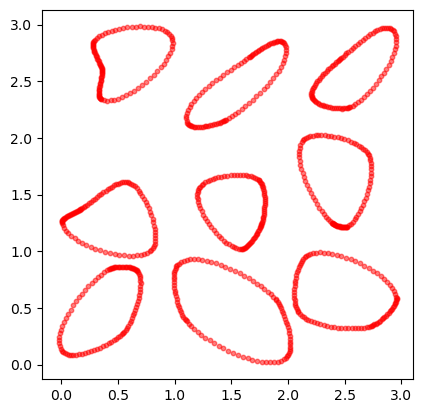

In [107]:
# ref: https://stackoverflow.com/questions/50731785/create-random-shape-contour-using-matplotlib

import numpy as np
from scipy.special import binom
import matplotlib.pyplot as plt


bernstein = lambda n, k, t: binom(n,k)* t**k * (1.-t)**(n-k)

def bezier(points, num=200):
    N = len(points)
    t = np.linspace(0, 1, num=num)
    curve = np.zeros((num, 2))
    for i in range(N):
        curve += np.outer(bernstein(N - 1, i, t), points[i])
    return curve

class Segment():
    def __init__(self, p1, p2, angle1, angle2, **kw):
        self.p1 = p1; self.p2 = p2
        self.angle1 = angle1; self.angle2 = angle2
        self.numpoints = kw.get("numpoints", 100)
        r = kw.get("r", 0.3)
        d = np.sqrt(np.sum((self.p2-self.p1)**2))
        self.r = r*d
        self.p = np.zeros((4,2))
        self.p[0,:] = self.p1[:]
        self.p[3,:] = self.p2[:]
        self.calc_intermediate_points(self.r)

    def calc_intermediate_points(self,r):
        self.p[1,:] = self.p1 + np.array([self.r*np.cos(self.angle1),
                                    self.r*np.sin(self.angle1)])
        self.p[2,:] = self.p2 + np.array([self.r*np.cos(self.angle2+np.pi),
                                    self.r*np.sin(self.angle2+np.pi)])
        self.curve = bezier(self.p,self.numpoints)


def get_curve(points, **kw):
    segments = []
    for i in range(len(points)-1):
        seg = Segment(points[i,:2], points[i+1,:2], points[i,2],points[i+1,2],**kw)
        segments.append(seg)
    curve = np.concatenate([s.curve for s in segments])
    return segments, curve

def ccw_sort(p):
    d = p-np.mean(p,axis=0)
    s = np.arctan2(d[:,0], d[:,1])
    return p[np.argsort(s),:]

def get_bezier_curve(a, rad=0.2, edgy=0):
    """ given an array of points *a*, create a curve through
    those points. 
    *rad* is a number between 0 and 1 to steer the distance of
          control points.
    *edgy* is a parameter which controls how "edgy" the curve is,
           edgy=0 is smoothest."""
    p = np.arctan(edgy)/np.pi+.5
    a = ccw_sort(a)
    a = np.append(a, np.atleast_2d(a[0,:]), axis=0)
    d = np.diff(a, axis=0)
    ang = np.arctan2(d[:,1],d[:,0])
    f = lambda ang : (ang>=0)*ang + (ang<0)*(ang+2*np.pi)
    ang = f(ang)
    ang1 = ang
    ang2 = np.roll(ang,1)
    ang = p*ang1 + (1-p)*ang2 + (np.abs(ang2-ang1) > np.pi )*np.pi
    ang = np.append(ang, [ang[0]])
    a = np.append(a, np.atleast_2d(ang).T, axis=1)
    s, c = get_curve(a, r=rad, method="var")
    x,y = c.T
    return x,y, a


def get_random_points(n=5, scale=0.8, mindst=None, rec=0):
    """ create n random points in the unit square, which are *mindst*
    apart, then scale them."""
    mindst = mindst or .7/n
    a = np.random.rand(n,2)
    d = np.sqrt(np.sum(np.diff(ccw_sort(a), axis=0), axis=1)**2)
    if np.all(d >= mindst) or rec>=200:
        return a*scale
    else:
        return get_random_points(n=n, scale=scale, mindst=mindst, rec=rec+1)


fig, ax = plt.subplots()
ax.set_aspect("equal")
np.random.seed(100) 

rad = 0.25
edgy = 0

for c in np.array([[0, 0], [0, 1], [1, 0], [1, 1], [0, 2], [2, 0], [2, 2], [1, 2], [2, 1]]):

    a = get_random_points(n=4, scale=1) + c
    x, y, _ = get_bezier_curve(a, rad=rad, edgy=edgy)
    plt.scatter(x[3::4], y[3::4], color="red", s=10, alpha=0.5)
    print(len(x[3::4]), len(y[3::4]))
plt.show()

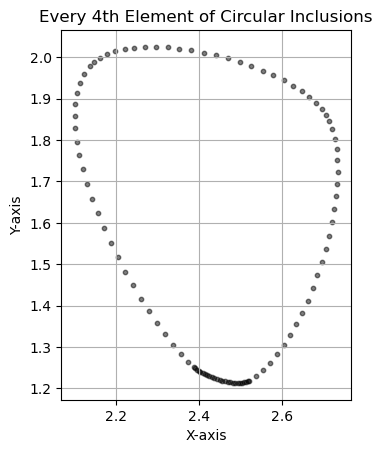

In [98]:
fig, ax = plt.subplots()
ax.set_aspect("equal")

# Plot every 4th element from x and y
ax.scatter(x[3::4], y[3::4], s=10, c='black', alpha=0.5)
# ax.plot(x,y ,c='black', alpha=0.5)

plt.title("Every 4th Element of Circular Inclusions")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid()
plt.show()


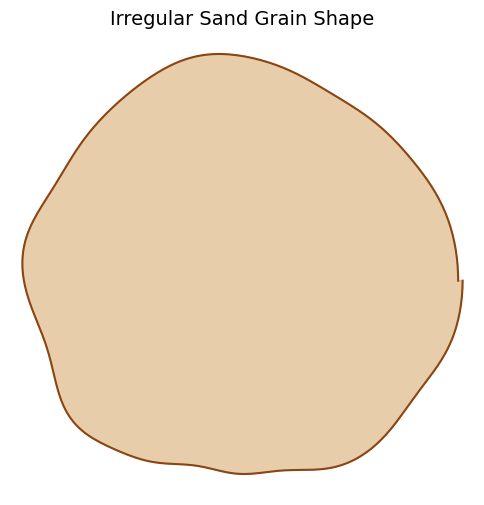

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def generate_irregular_particle(num_points=360, avg_radius=1.0, noise_strength=0.2):
    # Angle values
    theta = np.linspace(0, 2 * np.pi, num_points)

    # Raw noise
    noise = np.random.normal(0, noise_strength, size=num_points)
    smooth_noise = gaussian_filter1d(noise, sigma=10)  # Smooth to simulate natural contours

    # Radial function
    r = avg_radius + smooth_noise

    # Convert to Cartesian
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    return x, y

# Generate and plot
x, y = generate_irregular_particle()

plt.figure(figsize=(6,6))
plt.plot(x, y, color='saddlebrown')
plt.fill(x, y, color='burlywood', alpha=0.7)
plt.axis('equal')
plt.axis('off')
plt.title("Irregular Sand Grain Shape", fontsize=14)
plt.show()


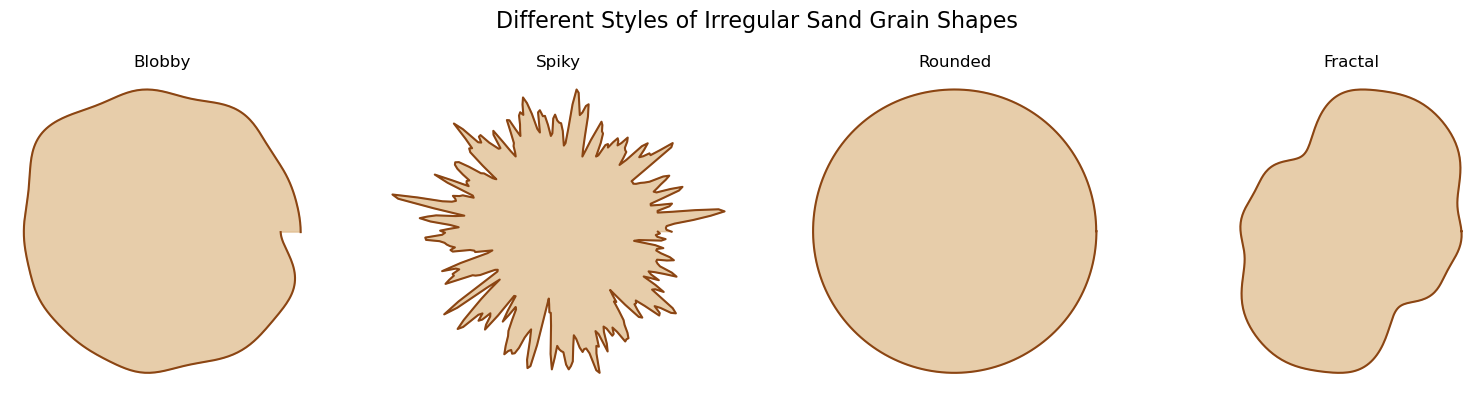

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def generate_sand_particle(style='blobby', num_points=360, avg_radius=1.0, noise_strength=0.2):
    theta = np.linspace(0, 2 * np.pi, num_points)
    
    if style == 'blobby':
        # Smooth noise (low-frequency)
        noise = np.random.normal(0, noise_strength, num_points)
        r = avg_radius + gaussian_filter1d(noise, sigma=10)

    elif style == 'spiky':
        # Sharper, jagged features (high-frequency noise)
        noise = np.random.normal(0, noise_strength * 1.5, num_points)
        r = avg_radius + gaussian_filter1d(noise, sigma=1)

    elif style == 'rounded':
        # Very slight variations, smooth
        noise = np.random.normal(0, noise_strength * 0.1, num_points)
        r = avg_radius + gaussian_filter1d(noise, sigma=20)

    elif style == 'fractal':
        # Sum of sine waves with varying frequency and amplitude
        r = np.full(num_points, avg_radius)
        for i in range(1, 6):  # add several layers of noise
            freq = i * 2
            amp = noise_strength / (i**1.5)
            r += amp * np.sin(freq * theta + np.random.rand() * 2 * np.pi)
    else:
        raise ValueError("Unknown style. Choose from: 'blobby', 'spiky', 'rounded', 'fractal'")

    # Convert polar to Cartesian
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    return x, y

# Example usage and plot
styles = ['blobby', 'spiky', 'rounded', 'fractal']
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

for ax, style in zip(axs, styles):
    x, y = generate_sand_particle(style=style)
    ax.plot(x, y, color='saddlebrown')
    ax.fill(x, y, color='burlywood', alpha=0.7)
    ax.set_aspect('equal')
    ax.set_title(style.capitalize())
    ax.axis('off')

plt.suptitle("Different Styles of Irregular Sand Grain Shapes", fontsize=16)
plt.tight_layout()
plt.show()
